In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

In [3]:
data=pd.read_csv('Movie_Review.csv')


In [4]:
data['sentiment'].value_counts()

sentiment
neg    500
pos    500
Name: count, dtype: int64

In [5]:
data.dropna(inplace=True)


In [6]:
data

,text,sentiment
0,"My daughter liked it but I was aghast, that a ...",neg
1,I... No words. No words can describe this. I w...,neg
2,this film is basically a poor take on the old ...,neg
3,"This is a terrible movie, and I'm not even sur...",neg
4,First of all this movie is a piece of reality ...,pos
...,...,...
995,"""Campfire Tales"" is basically made up of three...",pos
996,I just saw this film at the phoenix film festi...,pos
997,It's out of question that the real Anna Anders...,pos
998,Michelle Pfeiffer stars as a mob widow who see...,pos


In [7]:
def clean_review(review):
    str=' '.join(word for word in  review.split() if word.lower() not in stopwords.words('english'))
    return str

In [8]:
data['text']=data['text'].apply(clean_review)

In [9]:
#Word Cloud : creating word based on repetetion -> size of word
from wordcloud import WordCloud

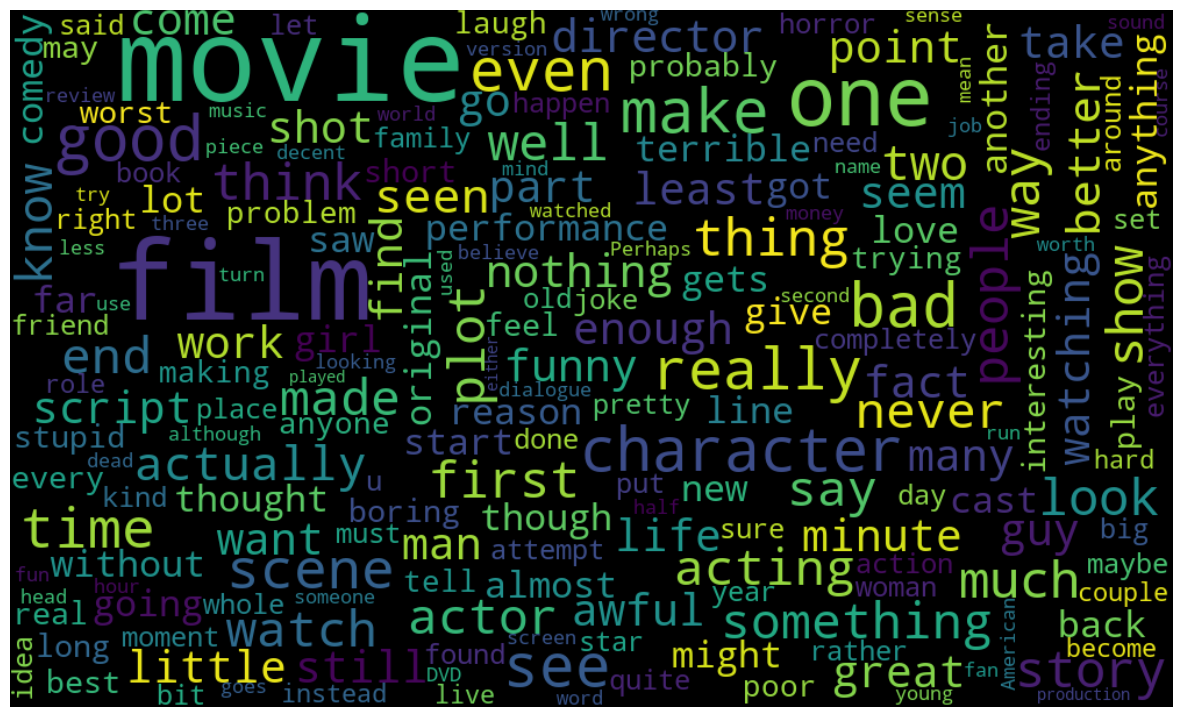

In [10]:
#Draw Wordcloud
reviews=''.join(word for word in data['text'][data['sentiment']=='neg'].astype(str))
wordcloud=WordCloud(height=600,width=1000,max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews),interpolation='bilinear')
plt.axis('off')
plt.show()

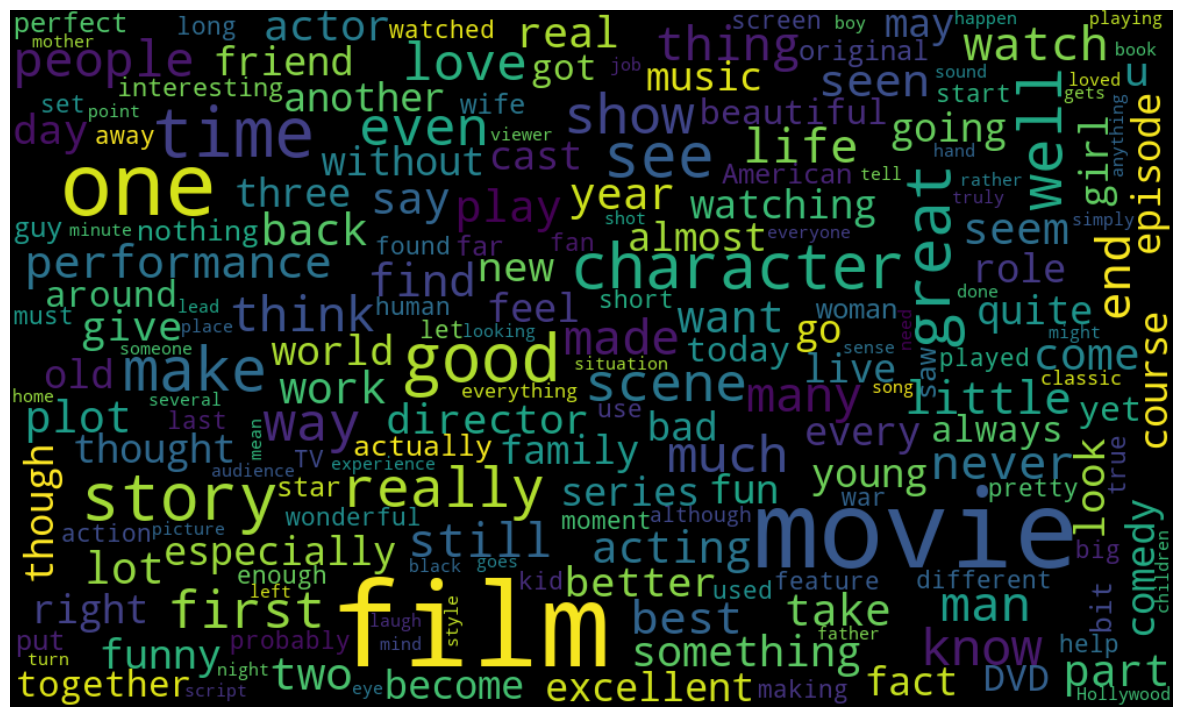

In [11]:
#Draw Wordcloud
reviews=''.join(word for word in data['text'][data['sentiment']=='pos'].astype(str))
wordcloud=WordCloud(height=600,width=1000,max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews),interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
#Model using= Logistical regerssion : it needs a numerical data,to feed it to the model
# Now use : tfidvectoriser to conv to numerical data

from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=2500)


In [13]:
reviews=cv.fit_transform(data['text']).toarray()

In [14]:
#Convert the neg and pos to 0 and 1
data['sentiment']=data['sentiment'].replace(['pos','neg'],[1,0])

In [15]:
data

,text,sentiment
0,"daughter liked aghast, character movie smokes....",0
1,I... words. words describe this. try sake brav...,0
2,film basically poor take old urban legend baby...,0
3,"terrible movie, I'm even sure terrible. ugly, ...",0
4,First movie piece reality well realized artist...,1
...,...,...
995,"""Campfire Tales"" basically made three spooky s...",1
996,saw film phoenix film festival today loved it....,1
997,question real Anna Anderson Princess Anastasia...,1
998,Michelle Pfeiffer stars mob widow seeks normal...,1


In [16]:
data['sentiment'].value_counts()

sentiment
0    500
1    500
Name: count, dtype: int64

#Creating Model

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model=LogisticRegression()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
reviews_train,reviews_test,sent_train,sent_test=train_test_split(reviews,data['sentiment'],test_size=0.2)

In [22]:
model.fit(reviews_train,sent_train)

LogisticRegression()

In [23]:
 #Now predict with the model
predict=model.predict(reviews_test)

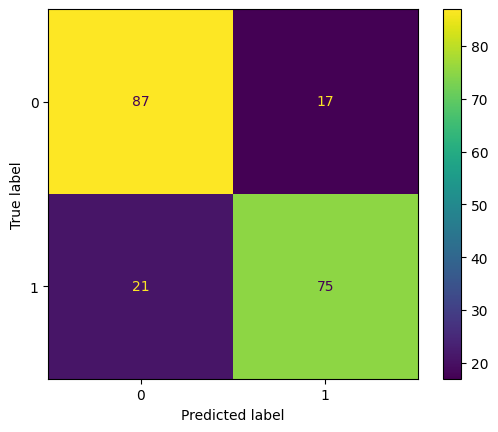

In [24]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(sent_test,predict,labels=model.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
display.plot()
plt.show()

In [25]:
#Export Model for creating web Application
import pickle as pk


In [26]:
pk.dump(model,open('model.pk1','wb'))

In [27]:
pk.dump(cv,open('scaler.pk1','wb'))